# **Data Science with Python: House Price Analysis**

## By Daniel Gomollón Embid
## 27/04/2025 - Cracow, Poland
### LinkedIn: https://www.linkedin.com/in/daniel-gomollon/

##Question 0. Setup: upload and import

In [23]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# We upload our CSV previously downloaded in (i.e Kaggle) -> kc_house_data.csv
uploaded = files.upload()
# Then load it into df:
df = pd.read_csv(next(iter(uploaded)))

Saving kc_house_data.csv to kc_house_data (2).csv


## Question 1. Show data types

In [24]:
# Q1: display dtypes
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


## Question 2: Drop unneeded columns and describe

In [25]:
# 1) See exactly which columns are in df
print(df.columns)

# 2) Build a drop-list only from columns that exist
to_drop = [c for c in ["id", "Unnamed: 0"] if c in df.columns]
df.drop(to_drop, axis=1, inplace=True)

# 3) Get your statistical summary
df.describe()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Question 3. Count unique lot values

In [26]:
# Q3: count unique 'sqft_lot' values and convert to DataFrame

# first, confirm which “lot” columns exist:
print([c for c in df.columns if 'lot' in c.lower()])

# now do the value_counts on the correct column:
vc = df["sqft_lot"].value_counts().to_frame(name="count")
vc.head()   # show the top 5 for brevity and do not include head() for the full list

['sqft_lot', 'sqft_lot15']


,count
sqft_lot,
5000,358
6000,290
4000,251
7200,220
4800,120


## Question 4. Boxplot: sea view outliers

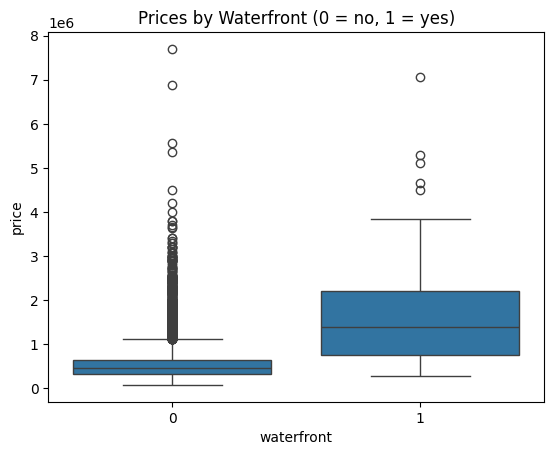

In [27]:
# Q4: seaborn boxplot to compare prices by waterfront
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Prices by Waterfront (0 = no, 1 = yes)")
plt.show()

## Question 5. Regplot: sqft_above vs price

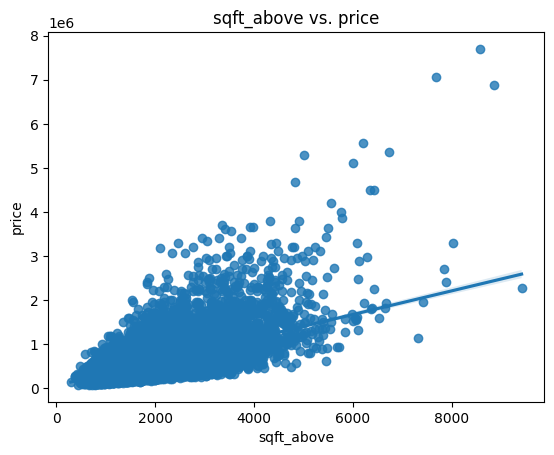

In [28]:
# Q5: seaborn regplot
sns.regplot(x="sqft_above", y="price", data=df)
plt.title("sqft_above vs. price")
plt.show()

## Question 6. Linear regression on sqft_living

In [29]:
# Q6: simple linear regression and R^2
X = df[["sqft_living"]]
y = df["price"]
lm = LinearRegression()
lm.fit(X, y)
r2_simple = lm.score(X, y)
print("R^2 (sqft_living):", r2_simple)

R^2 (sqft_living): 0.4928532179037931


## Question 7. Linear regression on multiple features

In [30]:
# Q7: Multi-feature regression. Drop any rows where features or price are NaN, then fit
features = [
    "floors","waterfront","lat","bedrooms",
    "sqft_basement","view","bathrooms",
    "sqft_living15","sqft_above","grade","sqft_living"
]

# Keep only the needed columns and drop rows with any NaNs
df2 = df[features + ["price"]].dropna()

X = df2[features]
y = df2["price"]

lm2 = LinearRegression()
lm2.fit(X, y)
r2_multi = lm2.score(X, y)
print("R² (multi-feature):", r2_multi)

R² (multi-feature): 0.6577312410909923


## Question 8. Pipeline with scaling, polynomial, linear

In [19]:
# Q8: pipeline
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])
pipe.fit(X, y)
r2_pipe = pipe.score(X, y)
print("R^2 (pipeline poly2):", r2_pipe)

R^2 (pipeline poly2): 0.7513484568241326


## Question 9. Ridge regression α=0.1

In [20]:
# Q9: train/test split + Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test, y_test)
print("R^2 (Ridge α=0.1):", r2_ridge)

R^2 (Ridge α=0.1): 0.6605218507530606


## Question 10. Ridge + 2nd-order polynomial

In [21]:
# Q10: poly→Ridge on train & test
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly  = poly2.transform(X_test)

ridge2 = Ridge(alpha=0.1)
ridge2.fit(X_train_poly, y_train)
r2_ridge2 = ridge2.score(X_test_poly, y_test)
print("R^2 (Ridge α=0.1, poly2):", r2_ridge2)

R^2 (Ridge α=0.1, poly2): 0.7336731476541178
